A) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
diabetes_data = pd.read_csv("diabetes.csv")
np.random.seed(42)
sample = diabetes_data.sample(n=25)

# Mean value of sample data
sample_mean_glucose = round(sample['Glucose'].mean(),2)
print("Mean of Glucose Value for Sample: ",sample_mean_glucose)

#Maximum value of sample data
sample_highest_glucose = sample['Glucose'].max()
print("Highest of Glucose Value for Sample: ",sample_highest_glucose)

#Mean value of loaded csv data
population_mean_glucose = round(diabetes_data['Glucose'].mean(),2)
print("Mean of Glucose Value for Population: ",population_mean_glucose)

#Maximum value of loaded csv data
population_highest_glucose = diabetes_data['Glucose'].max()
print("Highest of Glucose Value for Population: ",population_highest_glucose)

Mean of Glucose Value for Sample:  116.64
Highest of Glucose Value for Sample:  183
Mean of Glucose Value for Population:  120.89
Highest of Glucose Value for Population:  199


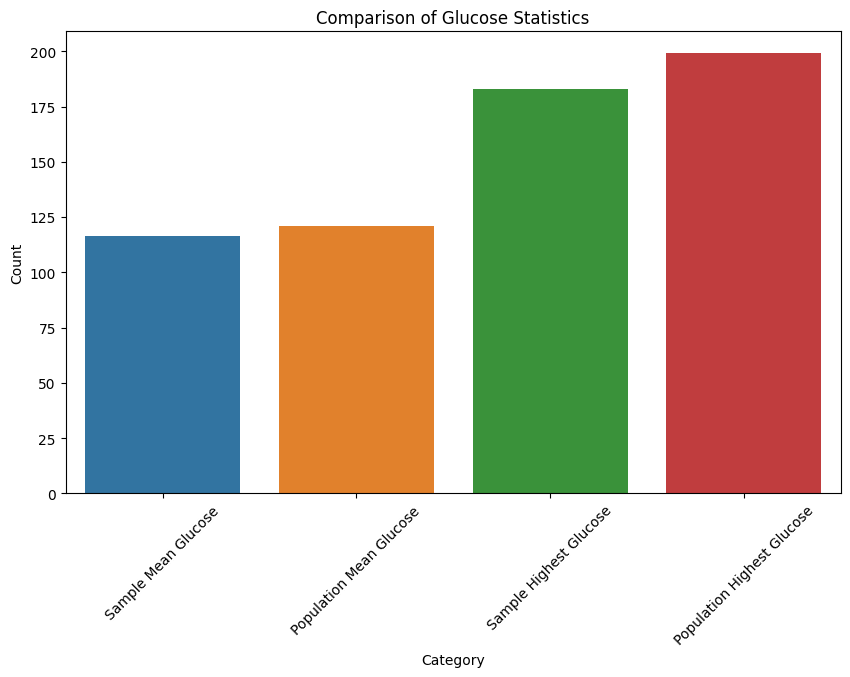

In [29]:
categories = ['Sample Mean Glucose', 'Population Mean Glucose', 'Sample Highest Glucose', 'Population Highest Glucose']
counts = [sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose]

df = pd.DataFrame({'Category': categories, 'Count': counts})

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df, hue=df['Category'], legend=False)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [30]:
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:",round(sample_98th_percentile_bmi,2))

population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
print("Population 98th percentile BMI:",round(population_98th_percentile_bmi,2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


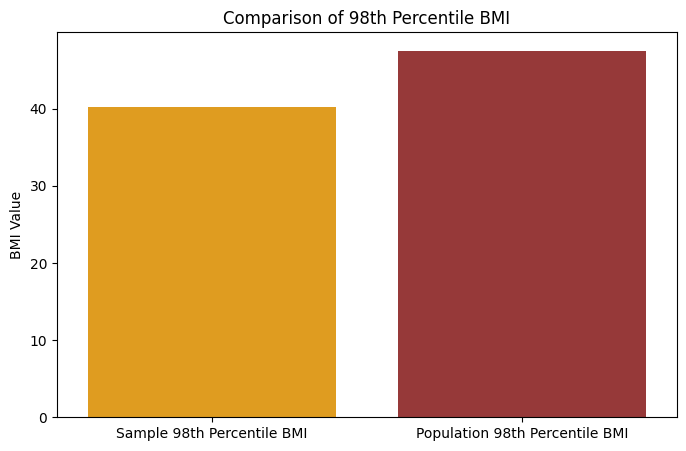

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            y=[sample_98th_percentile_bmi, population_98th_percentile_bmi],
            hue=['Sample', 'Population'], legend=False,
            palette=['orange', 'brown'],
            dodge=False)
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.show()

C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [32]:
def bootstrap_statistics(data, n_bootstrap_samples=500, sample_size=150):
    bs_means = []
    bs_stds = []
    bs_percentiles = []

    for _ in range(n_bootstrap_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        bs_means.append(np.mean(bootstrap_sample['BloodPressure']))
        bs_stds.append(np.std(bootstrap_sample['BloodPressure']))
        bs_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Using median instead of percentile

    return bs_means, bs_stds, bs_percentiles

bs_means, bs_stds, bs_percentiles = bootstrap_statistics(diabetes_data)

population_mean_blood_pressure = np.mean(diabetes_data['BloodPressure'])
print("Population Mean BP:", round(population_mean_blood_pressure, 2))

population_std_blood_pressure = np.std(diabetes_data['BloodPressure'])
print("Population Standard BP:", round(population_std_blood_pressure, 2))

population_percentile_blood_pressure = np.percentile(diabetes_data['BloodPressure'], 50)
print("Population Percentile BP:", round(population_percentile_blood_pressure, 2))


Population Mean BP: 69.11
Population Standard BP: 19.34
Population Percentile BP: 72.0


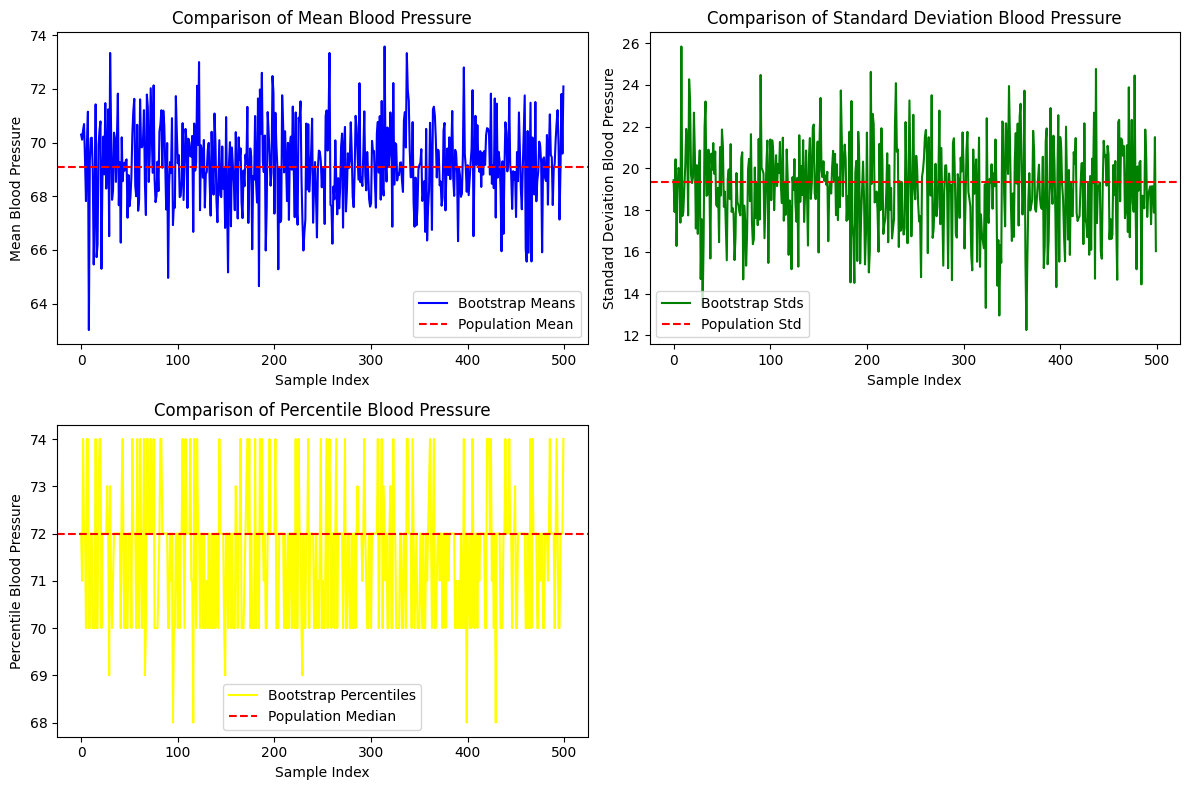

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x=range(len(bs_means)), y=bs_means, color='blue', label='Bootstrap Means')
plt.axhline(population_mean_blood_pressure, color='red', linestyle='--', label='Population Mean')
plt.title('Comparison of Mean Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Mean Blood Pressure')
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(x=range(len(bs_stds)), y=bs_stds, color='green', label='Bootstrap Stds')
plt.axhline(population_std_blood_pressure, color='red', linestyle='--', label='Population Std')
plt.title('Comparison of Standard Deviation Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Standard Deviation Blood Pressure')
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(x=range(len(bs_percentiles)), y=bs_percentiles, color='yellow', label='Bootstrap Percentiles')
plt.axhline(population_percentile_blood_pressure, color='red', linestyle='--', label='Population Median')
plt.title('Comparison of Percentile Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Percentile Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()


Findings:
1.	Glucose Statistics:
The mean glucose value in the sample is slightly lower than the population's, and the sample's highest glucose value is lower than the population's. The sample may have a little lower average glucose level and fewer extremely high glucose results than the population, according to this. This implies that, in comparison to the population, the sample might have a little lower average glucose level and fewer extremely high glucose values.

2.	BMI Statistics:
The 98th percentile BMI of the sample is much lower than the population's. This indicates that fewer individuals in the sample have excessively high BMI levels than the population as a whole.

3.	Blood Pressure (BP) Statistics:
The samples' blood pressure mean and standard deviation should be fairly close to population values due to the bootstrapping technique. However, the median blood pressure, or 50th percentile, of the bootstrap samples would likely also be near the population average.

In summary, while BMI percentiles vary, the sample generally reflects similar trends in blood pressure and glucose levels as seen in the overall population. The differences observed may be attributed to random sampling variation or potential mismatches between the sample and the population.



